In [59]:
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

# visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()

In [6]:
# loading processed data
df = pd.read_csv('../data/customer_churn.csv')

In [7]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,DailyCharges,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,2.186667,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,1.996667,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,2.463333,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,3.266667,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,2.796667,Mailed check,83.9,267.40


# Missing data

<Axes: >

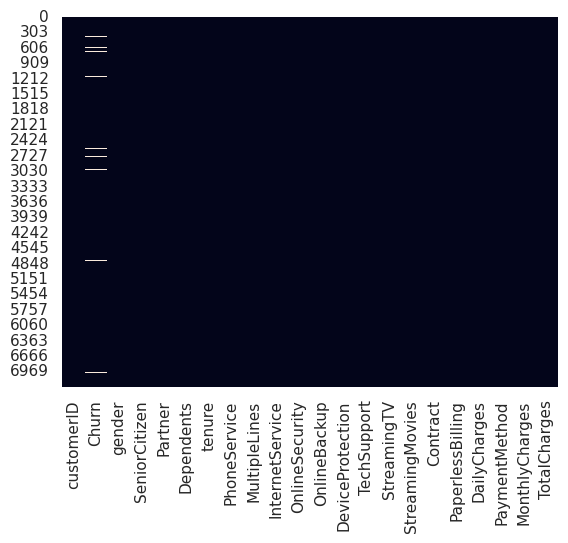

In [8]:
sns.heatmap(df.isna(), cbar=False)

# Churn analysis

In [69]:
df['Churn'].value_counts().index

Index(['No', 'Yes'], dtype='object')

In [70]:
df['Churn'].isna().sum()

224

In [71]:
# droping missing values
df.dropna(inplace=True)

In [72]:
df.describe()

,SeniorCitizen,tenure,DailyCharges,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,2.158723,64.761692,2279.734304
std,0.368612,24.559481,1.003002,30.090047,2266.794470
min,0.000000,0.000000,0.608333,18.250000,0.000000
25%,0.000000,9.000000,1.183333,35.500000,398.550000
50%,0.000000,29.000000,2.345000,70.350000,1394.550000
75%,0.000000,55.000000,2.995000,89.850000,3786.600000
max,1.000000,72.000000,3.958333,118.750000,8684.800000


In [73]:
cols = df.select_dtypes('object').columns[2:]
cols_arr = np.array(cols).reshape(3, 5)

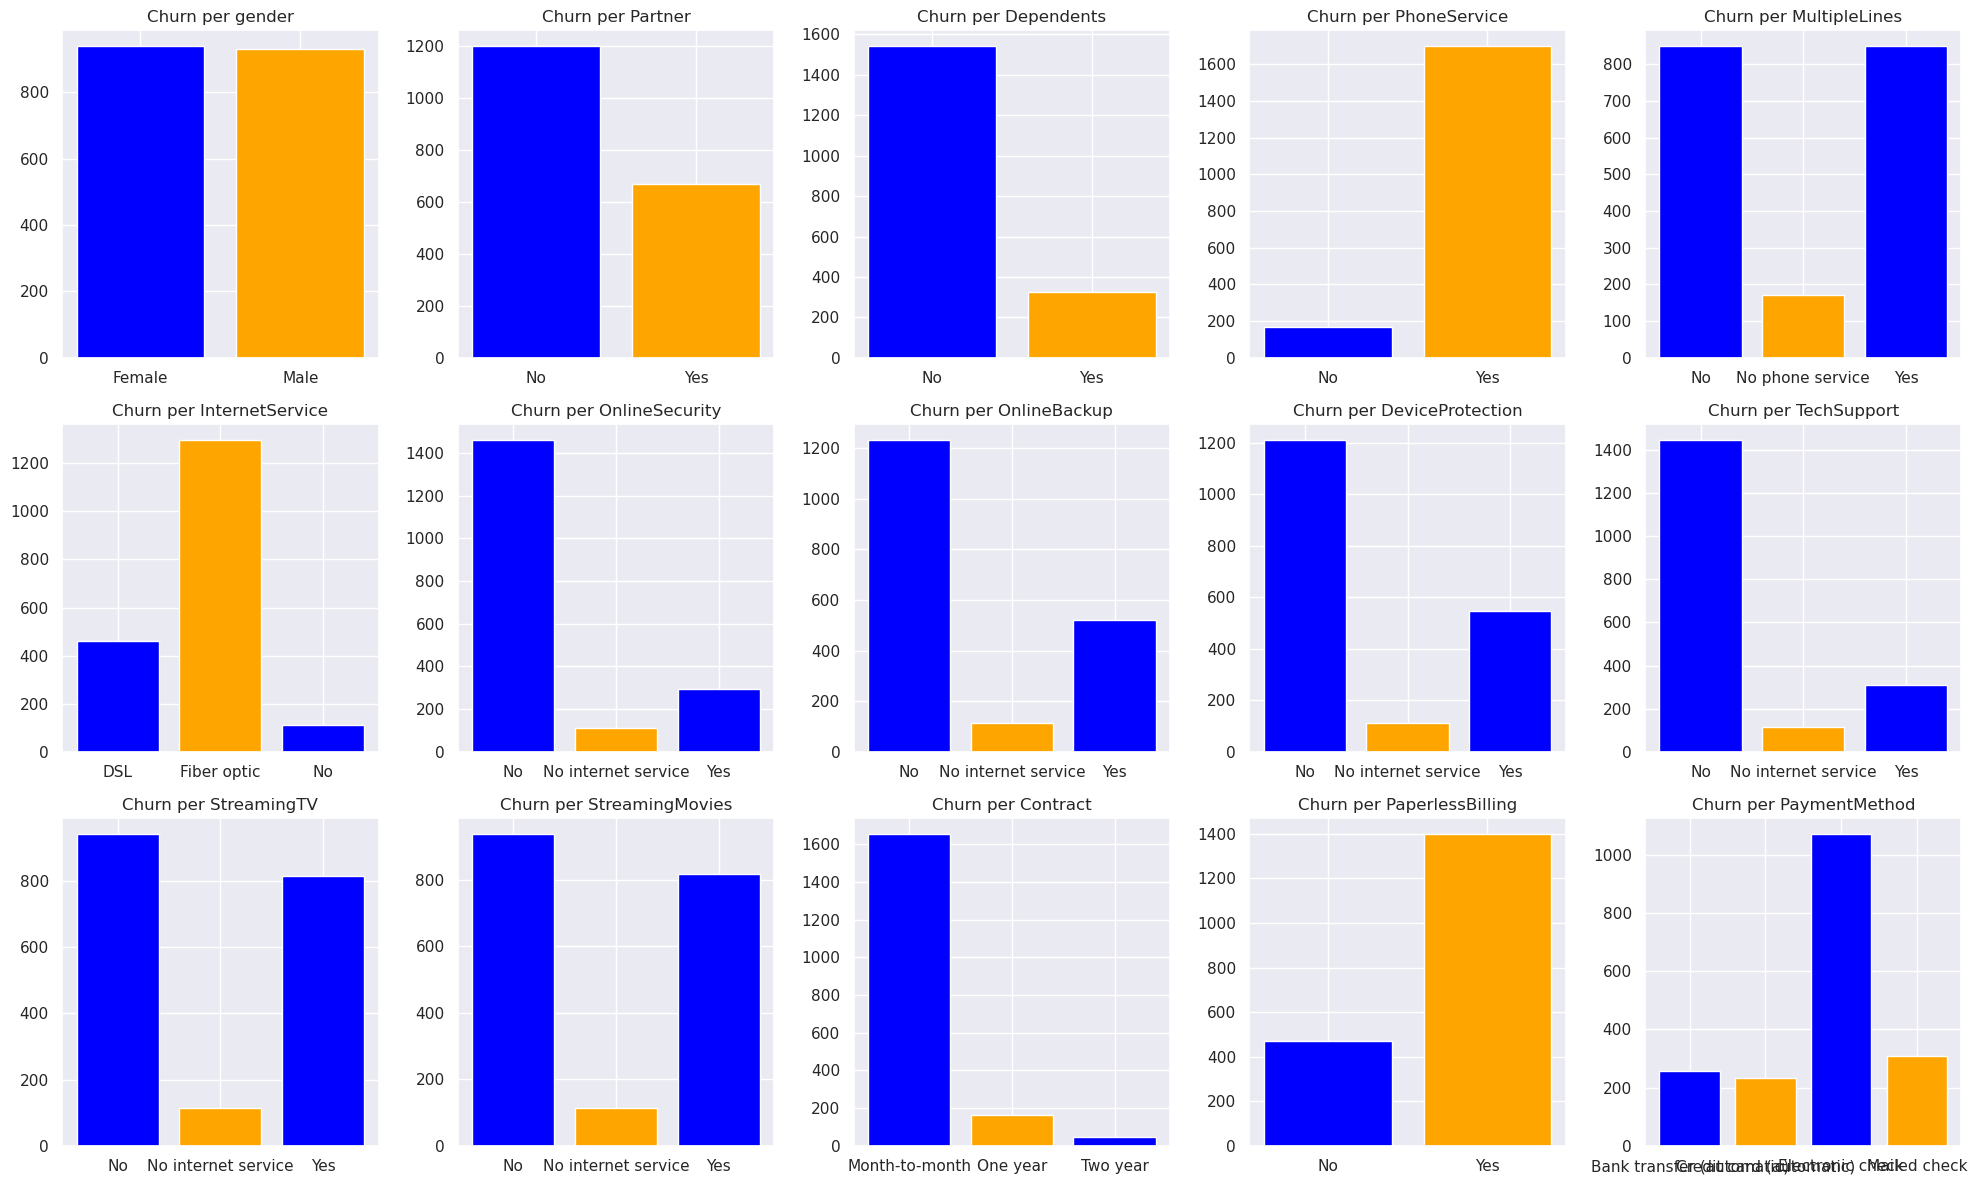

In [74]:
df_aux = df.copy()
df_aux['Churn'] = df_aux['Churn'].apply(lambda x: 0 if x == 'No' else 1)

fig, ax = plt.subplots(cols_arr.shape[0], cols_arr.shape[1], figsize = (20, 12))

for i in range(cols_arr.shape[0]):
    for j in range(cols_arr.shape[1]):
        df_churn_col = df_aux.groupby(cols_arr[i, j], as_index=False).agg({'Churn': 'sum'})
        ax[i, j].bar(x=cols_arr[i, j], height='Churn',
                     data=df_churn_col,
                     color=['blue', 'orange'])
        ax[i, j].set_title(f"Churn per {cols_arr[i, j]}")
plt.tight_layout()

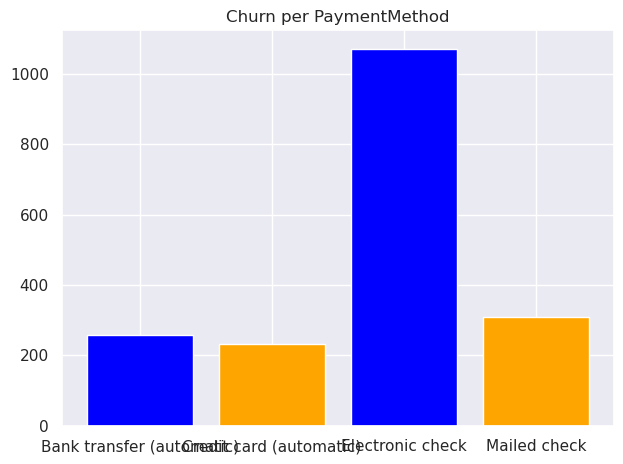

In [75]:
df_aux = df.copy()
df_aux['Churn'] = df_aux['Churn'].apply(lambda x: 0 if x == 'No' else 1)
df_churn_PaymentMethod = df_aux.groupby('PaymentMethod', as_index=False).agg({'Churn': 'sum'})
df_churn_PaymentMethod

plt.bar(x='PaymentMethod', height='Churn', 
        data=df_churn_PaymentMethod,
        color=['blue', 'orange'])
plt.title('Churn per PaymentMethod');
plt.tight_layout()

# Correlations

In [76]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'DailyCharges', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [77]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,DailyCharges,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,2.186667,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,1.996667,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,2.463333,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,3.266667,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,2.796667,Mailed check,83.9,267.40


In [78]:
binary_data = df[['Churn', 'gender', 'SeniorCitizen', 'Partner', 
                  'Dependents', 'PhoneService', 'PaperlessBilling']]

## Correlation between Churn and continuous variables

Since we are trying to assess the correlation between our continuous variables and the Churn, which is a categorical variable with binary data, we are going to use a **[Point Biserial Correlation](https://www.statology.org/point-biserial-correlation-python/)**

In [89]:
# label-encoding the Churn variable
label_encoder = LabelEncoder()
churn_encoded = label_encoder.fit_transform(df['Churn'].values)
  
pd.Series(churn_encoded).value_counts()

0    5174
1    1869
dtype: int64

In [93]:
continuous_variables_list = ['DailyCharges', 'MonthlyCharges', 'TotalCharges']

In [112]:
pb_corrs = {}

for var in continuous_variables_list:
    # calculate point biserial correlation
    a, b = df[var].values, churn_encoded
    point_biserial_corr = stats.pointbiserialr(a, b)

    # get correlation value and its correspondent p-value
    r, p = round(point_biserial_corr.correlation, 2), point_biserial_corr.pvalue

    pb_corrs[var] = r

In [113]:
pd.DataFrame(pb_corrs, index=['Churn', 'Churn', 'Churn'])

,DailyCharges,MonthlyCharges,TotalCharges
Churn,0.19,0.19,-0.2
Churn,0.19,0.19,-0.2
Churn,0.19,0.19,-0.2


## Tetrachoric Correlation (binary variables)

$rtet = cos (\frac{180}{1 + \sqrt{\frac{bc}{ad}}})$

In [35]:
def tetrachoric(x, y, digits=3):
    # build contingency table
    cont_table = pd.crosstab(index=x, columns=y).values
    
    # calculate tetrachoric correlation
    bc = cont_table[0, 1]*cont_table[1, 0]
    ad = cont_table[0, 0]*cont_table[1, 1]
    tet_corr = -np.cos(np.pi/(1 + np.sqrt(bc/ad)))
    
    return round(tet_corr, digits)

In [37]:
corr_dict = {}
for col in binary_data.columns:
    corrs = []
    for c in binary_data.columns:
        corrs.append(tetrachoric(df[col], df[c]))
    corr_dict[col] = corrs

In [49]:
pd.DataFrame(corr_dict, index=binary_data.columns)

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
Churn,1.000,-0.015,0.319,-0.268,-0.345,0.037,0.358
gender,-0.015,1.000,-0.009,-0.008,0.021,-0.013,-0.018
SeniorCitizen,0.319,-0.009,1.000,0.049,-0.618,0.037,0.363
Partner,-0.268,-0.008,0.049,1.000,0.716,0.050,-0.018
Dependents,-0.345,0.021,-0.618,0.716,1.000,-0.011,-0.191
PhoneService,0.037,-0.013,0.037,0.050,-0.011,1.000,0.037
PaperlessBilling,0.358,-0.018,0.363,-0.018,-0.191,0.037,1.000


<Axes: >

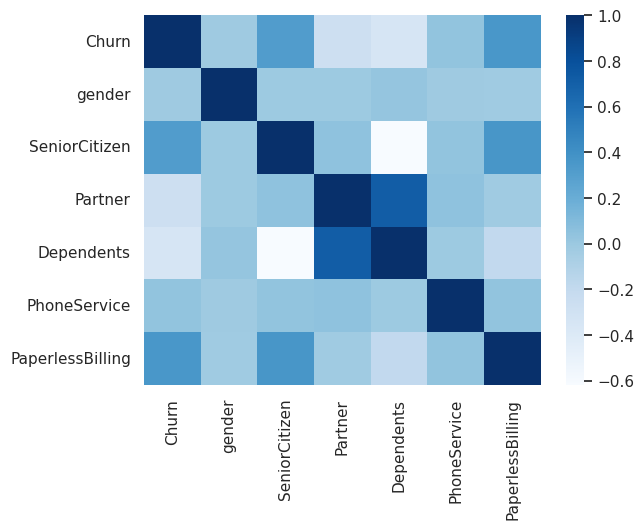

In [54]:
corr = pd.DataFrame(corr_dict, index=binary_data.columns)
sns.heatmap(corr, cmap='Blues')